In [20]:
import pandas as pd
import numpy as np
import networkx as nx
import random
from scipy.stats import pearsonr
from scipy.spatial import distance
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=20,20

Carrega a base de voos

In [3]:
international_flights = pd.read_csv('international_graph.csv')
international_flights = international_flights[['pais_origem', 'pais_destino', 'qtde_voos']]
international_flights = international_flights.set_index(['pais_origem', 'pais_destino'])

Descomentar para testes:

countries_loc = ['Brazil', 'Italy', 'China', 'United States', 'France', 'Germany', 'Iran', 'United Kingdom']
international_flights_loc = pd.DataFrame(columns=['pais_origem', 'pais_destino', 'qtde_voos'])

for index in international_flights.index:
    if index[0] in countries_loc and index[1] in countries_loc:
        df = pd.DataFrame({'pais_origem': [index[0]], 'pais_destino': [index[1]], 'qtde_voos': [float(international_flights.loc[index])]})
        international_flights_loc = international_flights_loc.append(df, ignore_index=True)

international_flights = international_flights_loc.set_index(['pais_origem', 'pais_destino'])

In [4]:
international_flights.head()

qtde_voos
pais_origem pais_destino           
Algeria     Argentina      0.001370
            Austria        0.173973
            Belgium        0.253425
            Brazil         0.021918
            Canada         0.272603

Constrói o vetor de correlação com a média de voos entre os países

In [5]:
international_flights_avg = pd.DataFrame(columns = ['source', 'target', 'value'])
indexes = international_flights.index
international_flights_avg_list = international_flights_avg[['source', 'target']].values.tolist()


for index in indexes:
    if list(index) not in international_flights_avg_list:
        if (index[1], index[0]) not in indexes:
            value_1 = [[index[0], index[1], international_flights.loc[(index[0], index[1])].qtde_voos]]
            value_2 = [[index[1], index[0], international_flights.loc[(index[0], index[1])].qtde_voos]]
        else:
            base_value =  (international_flights.loc[(index[0], index[1])].qtde_voos + international_flights.loc[(index[1], index[0])].qtde_voos)/2
            value_1 = [[index[0], index[1], base_value]]
            value_2 = [[index[1], index[0], base_value]]

        df = pd.DataFrame(value_1, columns=['source', 'target', 'value'])
        international_flights_avg = international_flights_avg.append(df, ignore_index = True)
        df = pd.DataFrame(value_2, columns=['source', 'target', 'value'])
        international_flights_avg = international_flights_avg.append(df, ignore_index = True) 
        
        international_flights_avg_list = international_flights_avg[['source', 'target']].values.tolist()
        

In [6]:
international_flights_avg.to_csv('transition_matrix_edge_list.csv', index=False)
international_flights_avg.head()

,source,target,value
0,Algeria,Argentina,0.005479
1,Argentina,Algeria,0.005479
2,Algeria,Austria,0.141781
3,Austria,Algeria,0.141781
4,Algeria,Belgium,0.307534


Constrói o grafo com a probabilidade de voos entre países

In [7]:
country_international_flights = international_flights_avg.groupby(['source']).sum() 
transition_matrix = international_flights_avg.copy()
transition_matrix = transition_matrix.drop(columns= ['value'])

transition_matrix['prob'] = 0.

for index, row in international_flights_avg.iterrows():
    weight = float(country_international_flights.loc[row['source']])
    transition_matrix.loc[index,'prob'] = row['value']/weight


In [8]:

transition_matrix.head()

,source,target,prob
0,Algeria,Argentina,0.000300
1,Argentina,Algeria,0.000166
2,Algeria,Austria,0.007769
3,Austria,Algeria,0.000590
4,Algeria,Belgium,0.016851


In [9]:
transition_matrix_crosstab = pd.crosstab(transition_matrix['target'], transition_matrix['source'], transition_matrix['prob'], aggfunc=sum)
transition_matrix_crosstab = transition_matrix_crosstab.fillna(0)

In [10]:
transition_matrix_crosstab

source,Algeria,Anguilla,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,...,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,West Bank,Western Sahara,Zambia
target,,,,,,,,,,,,,,,,,,,,,
Algeria,0.000000,0.0,0.000166,0.000000,0.000000,0.000000,0.000590,0.000000,0.000000,0.000128,...,0.000451,0.000012,0.000307,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Anguilla,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Argentina,0.000300,0.0,0.000000,0.000000,0.000466,0.000675,0.000006,0.000000,0.000000,0.000000,...,0.000894,0.008633,0.302989,0.000000,0.084052,0.000000,0.000000,0.000000,0.0,0.000000
Armenia,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000097,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Aruba,0.000000,0.0,0.000042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000008,0.001917,0.000613,0.000000,0.159483,0.000000,0.000000,0.000000,0.0,0.000000
Australia,0.000000,0.0,0.002537,0.000000,0.000000,0.000000,0.000211,0.000000,0.000000,0.000043,...,0.001893,0.022735,0.000000,0.000000,0.004310,0.000000,0.000000,0.000000,0.0,0.016336
Austria,0.007769,0.0,0.000042,0.021533,0.000000,0.000409,0.000000,0.009050,0.000000,0.000321,...,0.015732,0.004552,0.000000,0.000557,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Azerbaijan,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000006,0.000000,0.000000,0.000000,...,0.000005,0.000003,0.000000,0.000557,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Bahamas,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


Carrega o arquivo com o total diário de casos e pega o dia específico - 77

In [11]:
total_cases = pd.read_csv('total_cases_countries_normalized.csv')
total_cases = total_cases[['Name', 'Day', 'DailyCases']].set_index(['Name', 'Day'])

countries = transition_matrix_crosstab.columns.to_list()

indexes = []
for index in total_cases.index:
    indexes.append(index)

daily_cases = pd.DataFrame(columns=['n_cases'], index=[countries])

for country in countries:
    if (country, 77) not in indexes:
        daily_cases.loc[country, 'n_cases'] = 0. 
    else:
        daily_cases.loc[country, 'n_cases'] = total_cases.loc[country, 77][0]

In [12]:
daily_cases

,n_cases
Algeria,10
Anguilla,0
Argentina,9
Armenia,22
Aruba,0
Australia,77
Austria,156
Azerbaijan,0
Bahamas,0
Bahrain,7


Faz o random walk

In [13]:
def new_state_df(initial_number, transition_matrix_crosstab):

    state_df = pd.DataFrame(index=transition_matrix_crosstab.columns, columns = ['n_cases'])

    for country in state_df.index:
        if country == 'China':
            state_df.loc[country, 'n_cases'] = float(initial_number)
        else:
            state_df.loc[country, 'n_cases'] = 0.
            
    return state_df


Cria o dataframe a ser utilizado e roda o gridsearch

In [14]:
contamination_rate = [float(x)/10.0 for x in range(10,31,1)]
initial_number = [x for x in range(10,510,10)] 
correlation_df = pd.DataFrame(columns=['V', 'R', 'Euclidean Distance'])

for v in initial_number:
    for r in contamination_rate: 
        state_df = new_state_df(v, transition_matrix_crosstab)
        for i in range(78):
            if i == 0:
                state_df = transition_matrix_crosstab.dot(state_df)
            else:
                state_df = transition_matrix_crosstab.dot(state_df)
                state_df = state_df*r
                
        dist_euclidean = distance.euclidean(daily_cases, state_df)
        
        df = pd.DataFrame([{'V': v, 'R': r, 'Euclidean Distance': dist_euclidean}])
        correlation_df = correlation_df.append(df, ignore_index=True)
        
        if v==10 and r == 1.:
            min_dist = dist_euclidean
            v_min_dist = v
            r_min_dist = r
            
        elif abs(dist_euclidean)<abs(min_dist):
            min_dist = dist_euclidean
            v_min_dist = v
            r_min_dist = r
        
print('Menor distancia Euclideana: ' + str(min_dist))
print('V: ' + str(v_min_dist))
print('R: ' + str(r_min_dist))

/home/paulagiov/.local/lib/python2.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Menor distancia Euclideana: 4193.07575114
V: 10
R: 1.1


In [15]:
correlation_pivot = correlation_df.pivot(index='V', columns='R', values='Euclidean Distance')
correlation_pivot

R,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0
V,,,,,,,,,,,,,,,,,,,,,
10,5223.635354,4193.075751,2.688602e+06,1.278531e+09,3.845325e+11,7.800120e+13,1.122827e+16,1.195752e+18,9.751181e+19,6.267605e+21,...,1.393029e+25,5.007497e+26,1.535033e+28,4.067616e+29,9.428769e+30,1.932067e+32,3.532516e+33,5.810891e+34,8.664034e+35,1.178721e+37
20,5222.349173,5461.223233,5.380323e+06,2.557066e+09,7.690650e+11,1.560024e+14,2.245655e+16,2.391505e+18,1.950236e+20,1.253521e+22,...,2.786057e+25,1.001499e+27,3.070066e+28,8.135232e+29,1.885754e+31,3.864133e+32,7.065032e+33,1.162178e+35,1.732807e+36,2.357442e+37
30,5221.063564,8001.814535,8.072045e+06,3.835600e+09,1.153598e+12,2.340036e+14,3.368482e+16,3.587257e+18,2.925354e+20,1.880281e+22,...,4.179086e+25,1.502249e+27,4.605099e+28,1.220285e+30,2.828631e+31,5.796200e+32,1.059755e+34,1.743267e+35,2.599210e+36,3.536162e+37
40,5219.778526,10963.307630,1.076377e+07,5.114135e+09,1.538130e+12,3.120048e+14,4.491309e+16,4.783010e+18,3.900472e+20,2.507042e+22,...,5.572114e+25,2.002999e+27,6.140132e+28,1.627046e+30,3.771508e+31,7.728267e+32,1.413006e+34,2.324356e+35,3.465614e+36,4.714883e+37
50,5218.494061,14082.620289,1.345549e+07,6.392669e+09,1.922663e+12,3.900060e+14,5.614137e+16,5.978762e+18,4.875590e+20,3.133802e+22,...,6.965143e+25,2.503749e+27,7.675165e+28,2.033808e+30,4.714384e+31,9.660333e+32,1.766258e+34,2.905446e+35,4.332017e+36,5.893604e+37
60,5217.210167,17274.468905,1.614721e+07,7.671204e+09,2.307195e+12,4.680072e+14,6.736964e+16,7.174514e+18,5.850709e+20,3.760563e+22,...,8.358171e+25,3.004498e+27,9.210197e+28,2.440570e+30,5.657261e+31,1.159240e+33,2.119510e+34,3.486535e+35,5.198420e+36,7.072325e+37
70,5215.926847,20505.008153,1.883893e+07,8.949738e+09,2.691728e+12,5.460084e+14,7.859791e+16,8.370267e+18,6.825827e+20,4.387323e+22,...,9.751200e+25,3.505248e+27,1.074523e+29,2.847331e+30,6.600138e+31,1.352447e+33,2.472761e+34,4.067624e+35,6.064824e+36,8.251045e+37
80,5214.644099,23758.460482,2.153066e+07,1.022827e+10,3.076260e+12,6.240096e+14,8.982619e+16,9.566019e+18,7.800945e+20,5.014084e+22,...,1.114423e+26,4.005998e+27,1.228026e+29,3.254093e+30,7.543015e+31,1.545653e+33,2.826013e+34,4.648713e+35,6.931227e+36,9.429766e+37
90,5213.361925,27026.552338,2.422238e+07,1.150681e+10,3.460793e+12,7.020108e+14,1.010545e+17,1.076177e+19,8.776063e+20,5.640844e+22,...,1.253726e+26,4.506748e+27,1.381530e+29,3.660854e+30,8.485892e+31,1.738860e+33,3.179265e+34,5.229802e+35,7.797631e+36,1.060849e+38


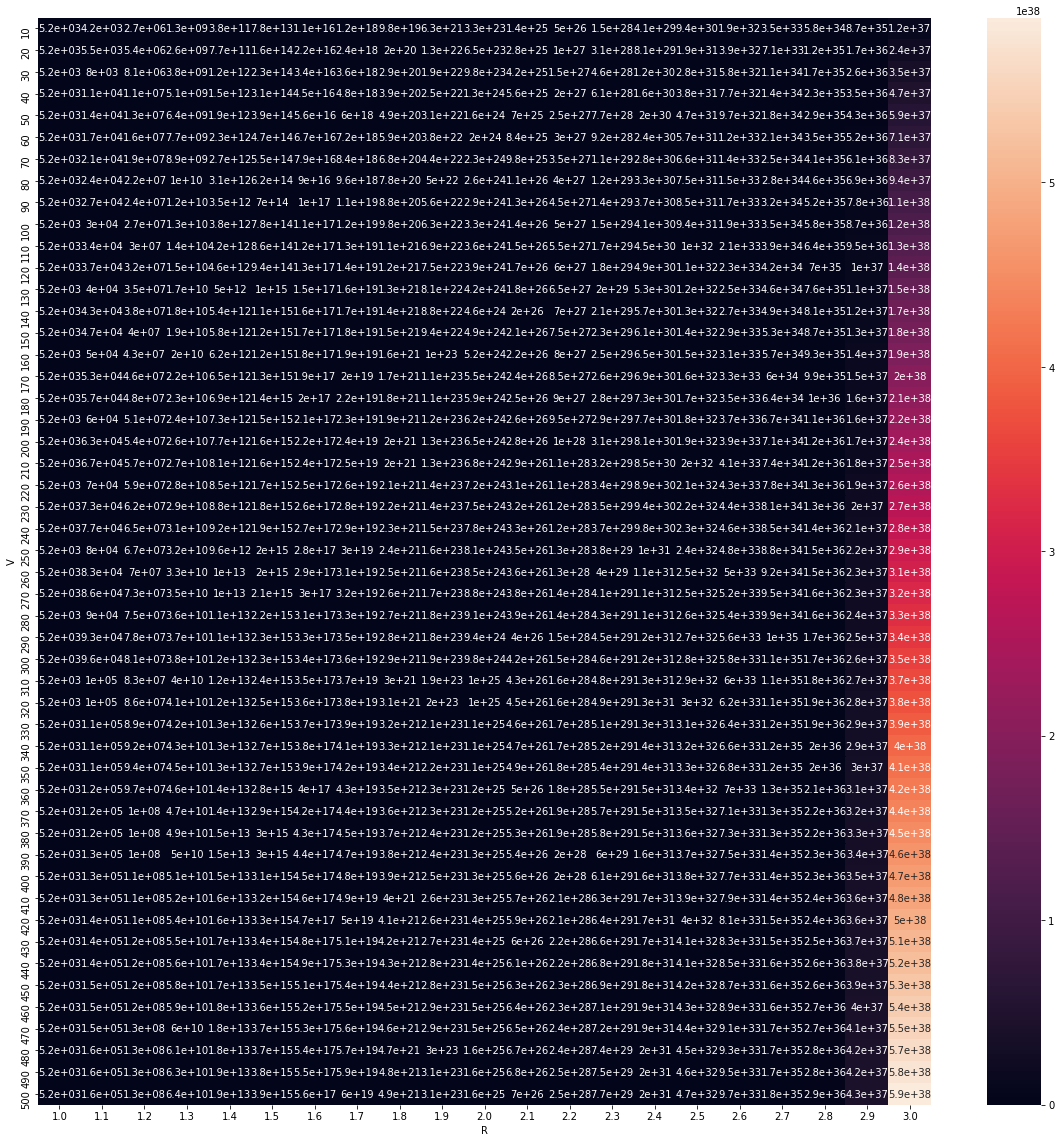

In [21]:
heatmap = sns.heatmap(correlation_pivot, annot=True)

In [17]:
state_df = new_state_df(10, transition_matrix_crosstab)

for i in range(78):
    if i == 0:
        state_df = transition_matrix_crosstab.dot(state_df)
    else:
        state_df = transition_matrix_crosstab.dot(state_df)
        state_df = state_df*1.1
        
state_df.to_csv('state_vector.csv')

In [18]:
state_df.head()

,n_cases
target,
Algeria,24.357881
Anguilla,0.001828
Argentina,43.959550
Armenia,1.443410
Aruba,3.927098
